Original Data Source = https://data.mendeley.com/datasets/jtzpkhw3mk/1


In [1]:
#Importing all lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading DataSet
df=pd.read_csv('C:/Users/manav/Desktop/Stats Project/cleaned Data.csv')
print(df)

      Code No       city    Age Group  Age  Gender religion Caste Category  \
0        4038  Hyderabad  31-40 years   36    Male    Hindu            OBC   
1        5177    Kolkata  51-60 years   52    Male   Others        General   
2        6065     Mumbai  21-30 years   30  Female   Others        General   
3        5034    Kolkata  41-50 years   42    Male    Hindu        General   
4        3027      Delhi  21-30 years   28    Male    Hindu        General   
...       ...        ...          ...  ...     ...      ...            ...   
1270     1025  Bengaluru  41-50 years   45    Male    Hindu            OBC   
1271     4043  Hyderabad  21-30 years   30    Male    Hindu            OBC   
1272     1010  Bengaluru  31-40 years   40  Female    Hindu        General   
1273     4029  Hyderabad  31-40 years   32  Female   Others            OBC   
1274     6206     Mumbai  41-50 years   41  Female    Hindu        General   

     Educational Level    Degree     Occupation  ...  \
0      

In [4]:
# basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Code No                     1275 non-null   int64  
 1   city                        1275 non-null   object 
 2   Age Group                   1275 non-null   object 
 3   Age                         1275 non-null   int64  
 4   Gender                      1275 non-null   object 
 5   religion                    1275 non-null   object 
 6   Caste Category              1275 non-null   object 
 7   Educational Level           1275 non-null   object 
 8   Degree                      1275 non-null   object 
 9   Occupation                  1275 non-null   object 
 10  Occupation Type             1275 non-null   object 
 11  Family Size                 1275 non-null   object 
 12  Members Count               1275 non-null   int64  
 13  Household with Senior(s)    1275 

In [5]:
# Summary of numeric columns
print(df.describe())

           Code No          Age  Members Count  Total Aged Member(S)  \
count  1275.000000  1275.000000    1275.000000           1275.000000   
mean   3517.164706    37.821961       4.246275              0.332549   
std    1744.897658     8.973211       1.385808              0.592337   
min    1001.000000    25.000000       0.000000              0.000000   
25%    2063.500000    30.000000       3.000000              0.000000   
50%    3182.000000    36.000000       4.000000              0.000000   
75%    5092.500000    45.000000       5.000000              1.000000   
max    6230.000000    59.000000      14.000000              4.000000   

       Income in rupess   anxiety No    stress No   depression  
count       1272.000000  1275.000000  1275.000000  1275.000000  
mean       21363.672956     3.507451     3.007843     3.187451  
std        20889.626435     3.127859     2.237721     2.597729  
min            0.000000     0.000000     0.000000     0.000000  
25%        12000.000000   

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Code No                         0
city                            0
Age Group                       0
Age                             0
Gender                          0
religion                        0
Caste Category                  0
Educational Level               0
Degree                          0
Occupation                      0
Occupation Type                 0
Family Size                     0
Members Count                   0
Household with Senior(s)        0
Total Aged Member(S)            0
Marital Status                  0
Residence Category              0
Residence Configuration         0
residence Ownership Status      0
Income Range                   13
Income in rupess                3
Covid Impact Level            255
anxiety No                      0
Anxiety Level                   0
stress No                       0
Stress Level                    0
depression                      0
Depression Level                0
dtype: int64


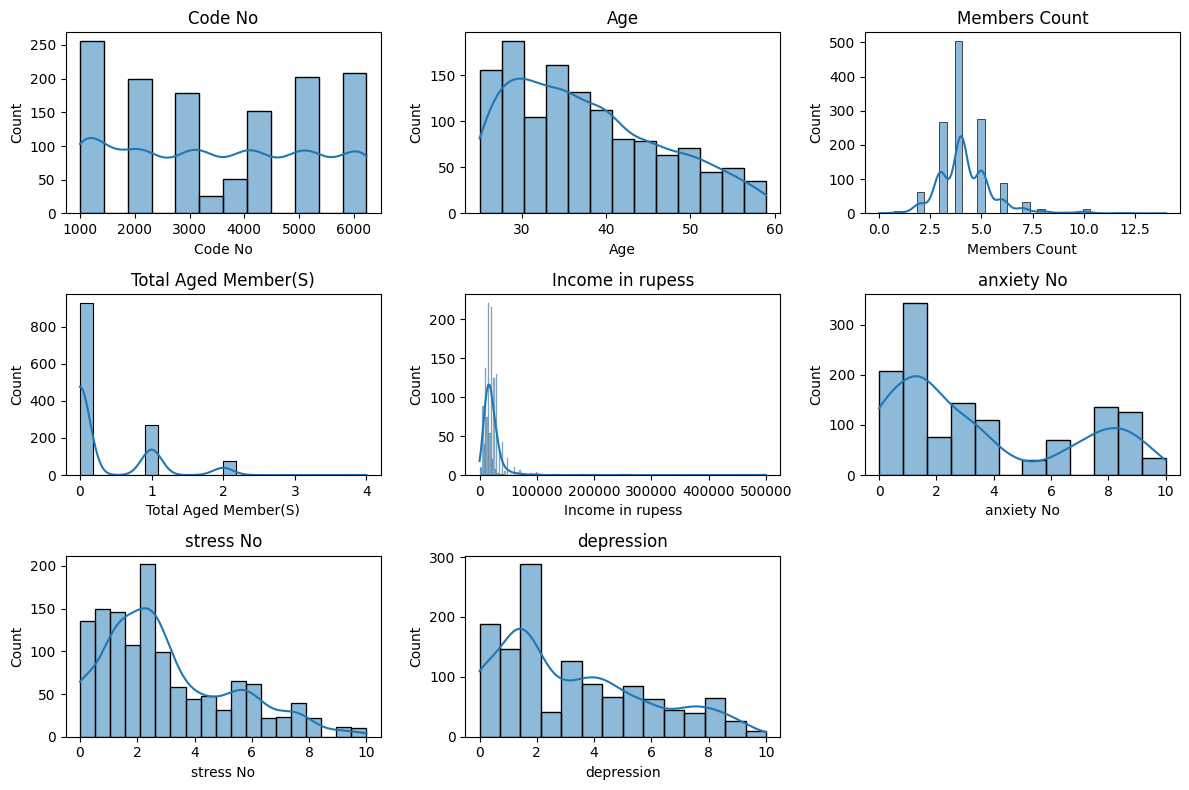

In [7]:
# Visualizing  numeric columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

In [18]:
#are stress, depression, anxiety linked?

correlation_matrix = df[['stress No', 'anxiety No', 'depression']].corr()

print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
            stress No  anxiety No  depression
stress No    1.000000    0.845953    0.865932
anxiety No   0.845953    1.000000    0.846600
depression   0.865932    0.846600    1.000000


The correlation coefficient between 'stress No' and 'anxiety No' is approximately 0.846, indicating a strong positive correlation.
The correlation coefficient between 'stress No' and 'depression' is approximately 0.866, indicating a strong positive correlation.
The correlation coefficient between 'anxiety No' and 'depression' is approximately 0.847, indicating a strong positive correlation.

These coefficients indicate strong positive correlations between stress, anxiety, and depression. A positive correlation implies that as one variable increases, the other variable tends to increase as well.

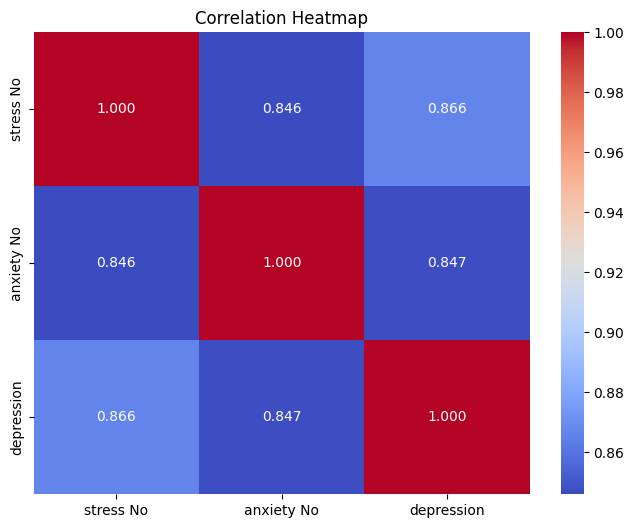

In [27]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()


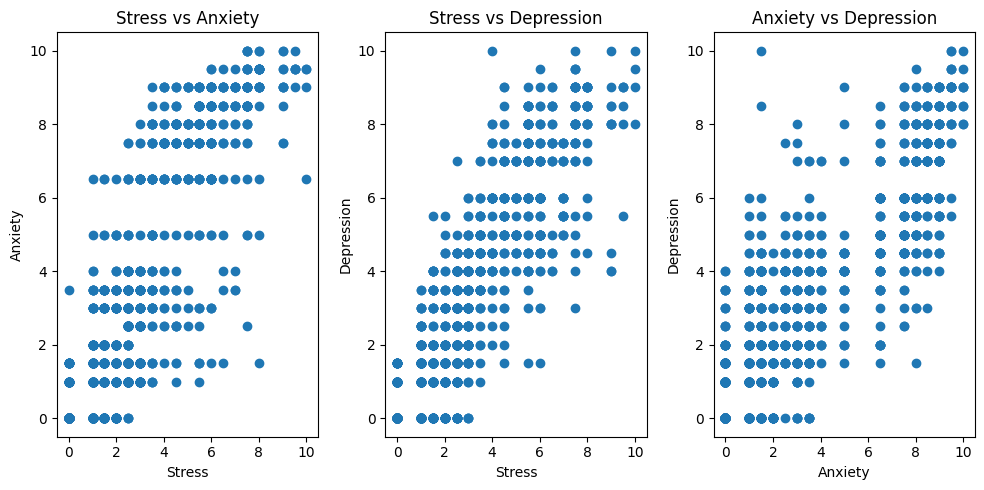

In [28]:
# Create pairwise scatter plots
plt.figure(figsize=(10, 5))

# Stress vs Anxiety
plt.subplot(1, 3, 1)
plt.scatter(df['stress No'], df['anxiety No'])
plt.xlabel('Stress')
plt.ylabel('Anxiety')
plt.title('Stress vs Anxiety')

# Stress vs Depression
plt.subplot(1, 3, 2)
plt.scatter(df['stress No'], df['depression'])
plt.xlabel('Stress')
plt.ylabel('Depression')
plt.title('Stress vs Depression')

# Anxiety vs Depression
plt.subplot(1, 3, 3)
plt.scatter(df['anxiety No'], df['depression'])
plt.xlabel('Anxiety')
plt.ylabel('Depression')
plt.title('Anxiety vs Depression')

plt.tight_layout()
plt.show()